# Sprint15 論文読解入門 

## 1.このSprintについて

### Sprintの目的
機械学習分野の論文から有益な情報を引き出せるようにする
これまで扱ってきた領域の論文から新たな知識を得る

### どのように学ぶか
ある論文に対しての問題に答えていくことで、読むポイントを学んでいきます。

## 2.論文読解
以下の論文を読み問題に答えてください。CNNを使った物体検出（Object Detection）の代表的な研究です。


[8]Ren, S., He, K., Girshick, R., Sun, J.: Faster r-cnn: Towards real-time object detection with region proposal networks. In: Advances in neural information processing systems. (2015) 91–99


https://arxiv.org/pdf/1506.01497.pdf

## 問題
それぞれについてJupyter Notebookにマークダウン形式で記述してください。

## 条件
答える際は論文のどの部分からそれが分かるかを書く。
必要に応じて先行研究（引用されている論文）も探しにいく。最低2つは他の論文を利用して回答すること。
論文の紹介記事を見ても良い。ただし、答えは論文内に根拠を探すこと。

## (1) 物体検出の分野にはどういった手法が存在したか。

以下  
[$最新のRegion CNN(R-CNN)を用いた物体検出入門 ~物体検出とは？ R-CNN, Fast R-CNN, Faster R-CNN, Mask R-CNN~$](https://qiita.com/arutema47/items/8ff629a1516f7fd485f9)  
より抜粋

### ＜Windowベース検出器＞

Alexnetの登場以降、精度の高い画像認識モデルを使い、画像を細かく数千以上に領域分割し、片っ端からCNNに突っ込むといった力技のアプローチ。  
非DNNアプローチに対して、DNNを使用したことにより、認識精度が大きく向上した。  
ただし、画像一枚につきCNNを数千～数万回回すこととなる為、検出が非常に遅い(リアルタイム性が低い)

### ＜R-CNN＞

<img src="https://qiita-user-contents.imgix.net/https%3A%2F%2Fqiita-image-store.s3.amazonaws.com%2F0%2F171915%2Fb7904f6a-c84f-810a-c97e-4fee2961f361.png?ixlib=rb-1.2.2&auto=format&gif-q=60&q=75&w=1400&fit=max&s=5066a0797df9e020fa49ceb98fcb3521" style="background-color:white;">

画像内に隈なくdetectorを走らせると計算コストが大きすぎるので、最初に物体があるっぽい領域を提案させよう！というアプローチ。
detectorは物体があるっぽい領域のみ計算すればいいのでWindowベースモデルよりは高速化が期待できる。
また物体があるっぽい領域をregion-of-interest(ROI)などと呼ぶ。またROIを提案するモデルをregion proposalと呼ぶ。

R-CNN系のDNNモデルの基本となる構造がここで提案されている。

1. 物体があるっぽい領域を提案するモデル
2. 画像認識をするモデル
とモデルは2-stage構成になっているのに注目したい。

R-CNNはregion proposalされた画像部分に対してCNNdetectorを回す。  
そのためCNNを回す回数はwindow-baseに対しては大幅に削減可能だ。

region proposalで使われるのは非DNN技術の従来技術のため精度がまだ低いという欠点があるものの、考え方そのものは汎用的で現代のtwo-staged detectorの基本となっている。
しかしregion proposal自体の精度は非常に重要で、物体のない領域を提案してしまうといくら後段のCNNの認識精度がどれほど高くても検出を間違えてしまう。  
またこのプロポーザル自体の演算量も大きいという欠点もあった。

### ＜Fast R-CNN＞

<img src="https://qiita-user-contents.imgix.net/https%3A%2F%2Fqiita-image-store.s3.amazonaws.com%2F0%2F171915%2F0ff412c4-94c4-c3ec-09ab-6a155990b134.png?ixlib=rb-1.2.2&auto=format&gif-q=60&q=75&w=1400&fit=max&s=936d983b00e799e11742114f4116dc70">

直球な名前が示すとおり、R-CNNの高速化を達成した研究だ。

ネットワーク図の方がわかりやすいのでそちらに注目する。

構造としてはR-CNNに似ている：RegionProposal(RP)があり、CNNがある。

ではどこがFastなのか？
RegionProposalはCNNの出力する特徴量領域を指しているのに注目したい。
（RPとCNN出力をつなぐRegion-of-interest pooling layerを提案している）

<Fast-RCNNのブレイクスルー>

F-RCNNでは画像認識を行う時には毎回CNNを走らせる必要はなく、RegionProposalの抽出した特徴領域を切り出し、全結合層に与えるだけでよい。
従来のR-CNNが画像認識毎にCNN層も走らせていたのに比べると大幅な高速化を達成できる。

実はこれはRegion Proposalの時間を除いた場合の比較でFast R-CNNはRegion Proposalの実行時間が支配的になってしまっている。
一枚の画像に2.3秒かかるが、そのうち2秒(86%!)がRegionProposalに費やされていた。

というのもFast R-CNNではRegion Proposalに従来技術であるSelective Searchを使用しており、そこが速度ボトルネックとなっていた。

### (2) Fasterとあるが、どういった仕組みで高速化したのか。

### Abstract
State-of-the-art object detection networks depend on region proposal algorithms to hypothesize object locations. Advances like SPPnet and Fast R-CNN have reduced the running time of these detection networks, exposing region proposal computation as a bottleneck.

SOTAの物体検出においては、領域提案のアルゴリズムを用いている。SPPnetやFast R-CNNなどの進歩によって、検出ネットワークの実行時間が短縮されているが、この領域提案の部分がボトルネックとなっている。

In this work, we introduce a Region Proposal Network(RPN) that shares full-image convolutional features with the detection network, thus enabling nearly cost-free region proposals.

この研究では、全画像の畳み込みの特徴を物体検出ネットワークと共有する領域提案ネットワーク(RPN:Region Proposal Network)を提案する。このネットワークがほとんどコストのない領域提案を可能にしている。

### (3) One-Stageの手法とTwo-Stageの手法はどう違うのか。

One-StageではOverFeatの論文で提示されているように、オブジェクトの位置判定と、そのカテゴリ判断を同時に決定している。

Two-Stageでは2段階の内、カスケードの1段目は領域提案タスクを処理し、カスケードの2段目でカテゴリ判断を行う。

### (4) RPNとは何か。

#### Abstract
An RPN is a fully convolutional network that simultaneously predicts object bounds and objectness scores at each position. The RPN is trained end-to-end to generate high-quality region proposals, which are used by Fast R-CNN for detection. We further merge RPN and Fast R-CNN into a single network by sharing their convolutional features—using the recently popular terminology of neural networks with “attention” mechanisms, the RPN component tells the unified network where to look.

Region Proposal Network(全画像を共有する領域提案ネットワーク)

RPNでは同時に物体の領域とその領域が物体かどうかのスコア(objectness scores)を予測するFCNである。RPNは高いクオリティでの領域提案をend-to-endで生成するように学習し、物体検出の部分はFast R-CNNが用いられている。さらに、RPNとFast R-CNNをattentionメカニズムによって畳み込んだ特徴を共有することで単一のネットワークに統合し、RPNコンポーネントは統合されたネットワークにどこを注目すべきかについて教えてくれる。



<img widths="120" src="https://cdn-ak.f.st-hatena.com/images/fotolife/l/lib-arts/20190618/20190618162526.png" style="background-color:white;">


<img widths="120" src="https://cdn-ak.f.st-hatena.com/images/fotolife/l/lib-arts/20190618/20190618165152.png" style="background-color:white;">

RPNは、ZFモデルやVGG-16モデルの最終層で抽出した特徴マップを受け取り、その特徴マップ上をスライドさせて畳込みを行う事で、  
ボックス回帰レイヤー（reg）とボックス分類レイヤー（cls）を作成する。  
reg層にはk個のボックスの座標をエンコードする4k出力があり、clsレイヤーには各提案の「オブジェクトの確率」または「オブジェクトでない確率」を推定する2kのスコアが出力されます。



### (5) RoIプーリングとは何か。

以下のサイトより引用  
[最新の物体検出手法Mask R-CNNのRoI AlignとFast(er) R-CNNのRoI Poolingの違いを正しく理解する](https://qiita.com/yu4u/items/5cbe9db166a5d72f9eb8)

RoI Poolingでは、ある程度畳み込み処理を行ったfeature mapから、region proposalにあたる部分領域をうまく「固定サイズのfeature map」として抽出します。
ここでは説明のため、入力画像サイズを320x480とし、これを解像度が1/32になるCNNにかけることで、10x15のfeature mapが得られたとし、RoI Poolの結果として3x3のfeature mapを抽出したいとします（通常RoI Poolingの出力としては7x7のfeature mapが利用されますが、説明のため3x3としています）。

<img width="640" src="https://qiita-user-contents.imgix.net/https%3A%2F%2Fqiita-image-store.s3.amazonaws.com%2F0%2F139809%2Fc81a5ac7-f159-0858-e1bd-e72fd42bdcc9.png?ixlib=rb-1.2.2&auto=format&gif-q=60&q=75&w=1400&fit=max&s=2afc5dabf75523f2877ad9bce5cfd543" style="background-color:white;">

上記の図のように、元画像のregion proposalの領域を、feature map上に投影してみると、当然feature mapとサブピクセルレベルのずれが発生します。
RoI Poolingでは、このずれを丸め込みながらPoolingを行います。

<img width="360" src="https://qiita-user-contents.imgix.net/https%3A%2F%2Fqiita-image-store.s3.amazonaws.com%2F0%2F139809%2F9acf6971-62c3-82e1-ea61-5ba0bb7698b1.png?ixlib=rb-1.2.2&auto=format&gif-q=60&q=75&w=1400&fit=max&s=cdb2e2ed3cc9e1a212d68b7eee9909b3" style="background-color:white;">

具体的にはまず、region proposalの座標を整数値に丸め、上記の赤い外接矩形を得ます。この時点で、最大0.5ピクセルのずれが発生します。これは、元画像ではCNNのstrideの半分に相当し、今回の例では32/2=16ピクセルのずれに相当します。

その後、その外接矩形をfeature mapのサイズと同じビン数（ここでは3x3）に等分割します。そして、feature mapのRoI内のピクセルを、それぞれ3x3つのビンのいずれかに割り当て、割り当てられたビンの中でmaxやaverageを取ることで、RoI Poolingの出力を得ます。

上図では、市松模様でfeature mapの各ピクセルの割り当てを表現しています。丸め方やピクセルの割り当て方は色々な方法が考えられます（切り捨ててしまうとか）が、上記の図のような形が誤差を小さくできるのではないでしょうか。
（こちらの動画では、RoIの取得時や、3x3の分割時に切り捨てを行う説明になっているので、かなり誤差があるように見えてしまいますが、オリジナルの論文でも"round"という表記をしています）

何れにせよ、RoIの取得と、ピクセルの割り当て時に丸め誤差が発生し、これがセグメンテーションなどの位置ずれがあまり許されないアプリケーションでは問題になります。

### (6) Anchorのサイズはどうするのが適切か。

デフォルトでは、3つのスケールと3つのアスペクト比を使用し、各スライド位置でk = 9個のアンカーを生成します。
ただし、各スケール毎にアンカーボックスの面積は揃える必要がある。  
つまり基準の長さ=64のとき、Anchor boxesは  
1:1→64×64 (=4096)  
1:2→45×91 (≒4096)  
2:1→91×45 (≒4096)  
ここで様々な形のboxが提案されることにより、正解値がどんな形であっても、ある程度似ているboxの候補をここで生成することが出来ます。  
この基準の長さと縦横比はハイパーパラメータとして調整することが可能です（縦長の工場の煙突や、横長のトラック等、極端に縦長の矩形があることが分かっているときは、5:1の縦横比を設定しておくなど）。

[Faster R-CNNにおけるRPNの世界一分かりやすい解説](https://medium.com/lsc-psd/faster-r-cnn%E3%81%AB%E3%81%8A%E3%81%91%E3%82%8Brpn%E3%81%AE%E4%B8%96%E7%95%8C%E4%B8%80%E5%88%86%E3%81%8B%E3%82%8A%E3%82%84%E3%81%99%E3%81%84%E8%A7%A3%E8%AA%AC-dfc0c293cb69)

### (7) 何というデータセットを使い、先行研究に比べどういった指標値が得られているか。

### データセット:＜PASCAL VOC 2007＞

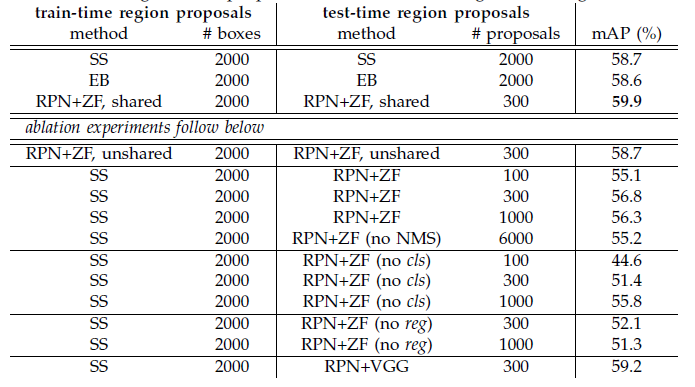

表2（上）は、さまざまな領域提案手法を使用してトレーニングおよびテストされたFast R-CNNの結果を示しています。
これらの結果はZFネットを使用しています。

Selective Search（SS）の場合、「高速」モードで約2000の提案を生成します。

EdgeBoxes（EB）の場合、0.7 IoUに調整されたデフォルトのEB設定によって提案を生成します。
Fast R-CNNフレームワークでは、SSのmAPは58.7％、EBのmAPは58.6％です。
それに対して、  
Fast R-CNNを使用したRPNは、最大300の提案を使用しながら、59.9％のmAPで競争力のある結果を達成している。

### データセット：＜Microsoft COCO object detection dataset＞

| COCO val COCO test-dev           |　        |               |       |               |        |        |
|----------------------------------|----------|---------------|-------|---------------|--------|--------|
| method                           |proposals | training data |mAP@.5 | mAP@[.5,.95]  | mAP@.5 | mAP@[.5,.95] |
| Fast R-CNN [2]                   |SS, 2000  |COCO train     | -     |       -       |  35.9  |   19.7   |      
| Fast R-CNN [impl. in this paper] |SS, 2000  |COCO train     | 38.6  |      18.9     |  39.3  |   19.3   |      
| Faster R-CNN                     |RPN, 300  |COCO train     | 41.5  |      21.2     |  42.1  |   21.5   |      
| Faster R-CNN                     |RPN, 300  |COCO trainval  | -     |       -       |  42.7  |   21.9   |      

Using the COCO training set to train, Faster R-CNN has 42.1% mAP@0.5 and 21.5% mAP@[.5, .95] on the COCO test-dev set.   
This is 2.8% higher for mAP@0.5 and 2.2% higher for mAP@[.5, .95] than the Fast RCNN counterpart under the same protocol (Table 11).  
This indicates that RPN performs excellent for improving the localization accuracy at higher IoU thresholds.

COCOトレーニングセットを使用してトレーニングを行うと、Faster R-CNNは、COCO test-devセットにおいてmAP@0.5で、42.1％とmAP@[.5、.95]では、21.5％となります。
これは、mAP@0.5の場合は2.8％高く、mAP@[.5、.95]の場合は同じプロトコルのFast RCNNと比較して2.2％高くなっています。
これは、RPNがIoUしきい値が高い場合にローカリゼーションの精度を向上させるのに優れていることを示しています。

### データセット：＜Faster_R-CNN in ILSVRC & COCO 2015 competitions＞

Only by replacing VGG-16 with a 101- layer residual net (ResNet-101) [18], the Faster R-CNN system increases the mAP from 41.5%/21.2% (VGG-16) to 48.4%/27.2% (ResNet-101) on the COCO val set.   
With other improvements orthogonal to Faster RCNN, He et al. [18] obtained a single-model result of 55.7%/34.9% and an ensemble result of 59.0%/37.4% on the COCO test-dev set, which won the 1st place in the COCO 2015 object detection competition.   
The same system [18] also won the 1st place in the ILSVRC 2015 object detection competition, surpassing the second place by absolute 8.5%.   
RPN is also a building block of the 1st-place winning entries in ILSVRC 2015 localization and COCO 2015 segmentation competitions, for which the details are available in [18] and [15] respectively.  

COCO valセットでは、VGG-16を101層の残差ネット（ResNet-101）に置き換えることによって、Faster R-CNNシステムはmAPを41.5％/ 21.2％（VGG-16）から48.4％/ 27.2％（ResNet -101）に向上します。  
Faster RCNNに直交するその他の改善により、COCO test-devセットで55.7％/ 34.9％の単一モデル結果と59.0％/ 37.4％のアンサンブル結果が得られ、COCO 2015オブジェクト検出コンテストで1位を獲得しました。   
同じシステムも、ILSVRC 2015オブジェクト検出コンテストで1位を獲得し、2位を8.5％超えました。

### (8) （アドバンス課題）Faster R-CNNよりも新しい物体検出の論文では、Faster R-CNNがどう引用されているか。

## Skip